In [1]:
# Investigate list of Nintendo Switch games to recommend highest rated single player, two-player and multi-player options 
# by genre

import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

# Data downloaded from https://www.kaggle.com/datasets/giovanni60310/nintendo-switch-games-reviews?select=switch-games.csv

df = pd.read_csv(r"C:\Users\datri\Downloads\nintendo_games\switch-games.csv")
df.shape

(637, 14)

In [2]:
df.head()

,id,title,game_url,image_url,system,publisher,developer,genre,num_players,release_date,review,review_conclusion,num_votes,rating
0,0f0191a3,The DioField Chronicle,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/d9a6ef84ec8cf/...,Nintendo Switch,Square Enix,Square Enix,RPG Simulation Strategy,1,22nd Sep 2022,Published by Square Enix and developed with as...,Despite its shortcomings The DioField Chronic...,0,0.0
1,f2af5f5f,The Legend of Heroes: Trails from Zero,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/004c2655b08cc/...,Nintendo Switch,NIS America,Nihon Falcom,RPG,1,27th Sep 2022,We dont blame you if you’re intimidated by Fal...,In a series renowned for its stellar writing ...,0,0.0
2,a8996117,NBA 2K23,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/60aff0dbdc402/...,Nintendo Switch,2K,Visual Concepts,Sports,4 (10 Online),9th Sep 2022,Its once again reached that time of year when ...,NBA 2K23 makes the inevitable downgrades and c...,2,0.0
3,e2f10932,Temtem,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/c6c585ce49b59/...,Nintendo Switch,Humble Games,Crema Games,Action Adventure RPG,1 (999 Online),6th Sep 2022,At the beginning of our Temtem adventure we h...,Even without the endgame content Temtem is wo...,5,7.8
4,51ff4f64,Made in Abyss: Binary Star Falling into Darkness,https://www.nintendolife.com/reviews/nintendo-...,https://images.nintendolife.com/063177f5b67f4/...,Nintendo Switch,Spike Chunsoft US,Chime,Action RPG,1,2nd Sep 2022,Made in Abyss feels like an anime/manga ripe f...,Made in Abyss is an odd game to recommend; the...,2,0.0


In [3]:
df.drop(columns=['game_url','image_url'], inplace=True)
df.columns

Index(['id', 'title', 'system', 'publisher', 'developer', 'genre',
       'num_players', 'release_date', 'review', 'review_conclusion',
       'num_votes', 'rating'],
      dtype='object')

In [4]:
df.head()

,id,title,system,publisher,developer,genre,num_players,release_date,review,review_conclusion,num_votes,rating
0,0f0191a3,The DioField Chronicle,Nintendo Switch,Square Enix,Square Enix,RPG Simulation Strategy,1,22nd Sep 2022,Published by Square Enix and developed with as...,Despite its shortcomings The DioField Chronic...,0,0.0
1,f2af5f5f,The Legend of Heroes: Trails from Zero,Nintendo Switch,NIS America,Nihon Falcom,RPG,1,27th Sep 2022,We dont blame you if you’re intimidated by Fal...,In a series renowned for its stellar writing ...,0,0.0
2,a8996117,NBA 2K23,Nintendo Switch,2K,Visual Concepts,Sports,4 (10 Online),9th Sep 2022,Its once again reached that time of year when ...,NBA 2K23 makes the inevitable downgrades and c...,2,0.0
3,e2f10932,Temtem,Nintendo Switch,Humble Games,Crema Games,Action Adventure RPG,1 (999 Online),6th Sep 2022,At the beginning of our Temtem adventure we h...,Even without the endgame content Temtem is wo...,5,7.8
4,51ff4f64,Made in Abyss: Binary Star Falling into Darkness,Nintendo Switch,Spike Chunsoft US,Chime,Action RPG,1,2nd Sep 2022,Made in Abyss feels like an anime/manga ripe f...,Made in Abyss is an odd game to recommend; the...,2,0.0


In [5]:
df.dtypes

id                    object
title                 object
system                object
publisher             object
developer             object
genre                 object
num_players           object
release_date          object
review                object
review_conclusion     object
num_votes             object
rating               float64
dtype: object

In [6]:
# convert num_votes to integer, but need to remove ' ' characters

df['num_votes'] = df['num_votes'].replace(' ','',regex=True).astype('int64')

In [7]:
df.dtypes

id                    object
title                 object
system                object
publisher             object
developer             object
genre                 object
num_players           object
release_date          object
review                object
review_conclusion     object
num_votes              int64
rating               float64
dtype: object

In [8]:
# what is median number of votes for all games?

df['num_votes'].median()

21.0

In [9]:
# create new df for all games with >median number of votes

df_reviewed = df[df['num_votes']>df['num_votes'].median()]

In [10]:
df_reviewed.shape

# approx half the game titles eliminated from consideration

(317, 12)

In [11]:
# review different genres described

df_reviewed['genre'].value_counts()

genre
Action  Adventure                 30
Action                            24
Action  RPG                       21
Action  Adventure  RPG            18
RPG                               18
                                  ..
Action  First Person  FPS  RPG     1
Adventure  FPS                     1
Party  Puzzle                      1
Arcade  Fighting  Sports           1
Party                              1
Name: count, Length: 102, dtype: int64

In [12]:
# find records with missing genre description

df_reviewed['genre'].isnull().sum()

11

In [13]:
# check number of votes for records with missing genre information 

df_reviewed[df_reviewed['genre'].isnull()]

# all have more than median number of votes, so keep data for analysis

,id,title,system,publisher,developer,genre,num_players,release_date,review,review_conclusion,num_votes,rating
78,3ae187ae,World War Z,Nintendo Switch,Saber Interactive,Saber Interactive,NaN,NaN,2nd Nov 2021,Saber Interactives World War Z is the very def...,World War Z is an unremarkable zombie shooter ...,28,7.6
90,a8ec626b,FIFA 22,Nintendo Switch,Electronic Arts,NaN,NaN,NaN,1st Oct 2021,“Fool me once ” the famous phrase goes “shame...,FIFA 22 marks the third time EA has given us F...,32,2.2
352,e8ad9d4f,Star Wars Pinball,Nintendo Switch,Zen Studios,Zen Studios,NaN,NaN,13th Sep 2019,Do you like Star Wars? Do you like pinball? If...,Star Wars has finally come to Nintendo Switch....,38,7.6
371,f5ce3515,Wolfenstein: Youngblood,Nintendo Switch,Bethesda Game Studios,Panic Button,NaN,NaN,26th Jul 2019,The modern incarnation of Wolfenstein has alwa...,Wolfenstein: Youngblood is an odd little thing...,42,6.7
378,bbf92321,Dragon Quest Builders 2,Nintendo Switch,Square Enix,Square Enix,NaN,NaN,12th Jul 2019,Though the Minecraft formula has been iterated...,It takes a surprising amount of effort to beat...,173,8.3
381,4e286418,Red Faction: Guerrilla Re-Mars-tered,Nintendo Switch,THQ Nordic,Kaiko,NaN,NaN,2nd Jul 2019,When the original Red Faction dropped in 2001 ...,It’s crazy to think that the original Red Fact...,22,7.2
387,1eac34b7,Collection of Mana,Nintendo Switch,Square Enix,Square Enix,NaN,NaN,11th Jun 2019,While Squares Seiken Densetsu series continues...,When you consider how many titles Konami is pa...,178,7.9
481,18b65b98,Super Mario Party,Nintendo Switch,Nintendo,Nd Cube,NaN,4,16th Nov 2018,To say that the Mario Party series has had a t...,Recent Mario Party games have previously had a...,414,7.4
491,899133c3,Nintendo Labo Toy-Con 03: Vehicle Kit,Nintendo Switch,Nintendo,Nintendo,NaN,NaN,14th Sep 2018,The first two Nintendo Labo kits offered two v...,The third Labo kit is perhaps the best one yet...,22,7.4
514,911a9557,Captain Toad: Treasure Tracker,Nintendo Switch,Nintendo,Nintendo,NaN,NaN,13th Jul 2018,Captain Toad: Treasure Tracker was a real hidd...,Captain Toad: Treasure Tracker is a hidden gem...,288,8.1


In [14]:
# replace nulls in the genre column with ''

df_reviewed['genre'].fillna('', inplace=True)

In [15]:
# check number of votes for records with missing genre information

df_reviewed[df_reviewed['genre'].isnull()]

,id,title,system,publisher,developer,genre,num_players,release_date,review,review_conclusion,num_votes,rating


In [16]:
# function to create new column to limit options in genre column - action, platformer, RPG, shooter/FPS, sports, party, fighting

# define function to organize genre into fewer categories
def select_genre(genre_in):
    if 'Platformer' in genre_in:
        return 'Platformer'
    if 'RPG' in genre_in:
        return 'RPG'
    if ('Shooter' in genre_in) or ('FPS' in genre_in):
        return 'Shooter'
    if ('Sports' in genre_in) or ('Racing' in genre_in):
        return 'Sports'
    if 'Adventure' in genre_in:
        return 'Adventure'
    if 'Action' in genre_in:
        return 'Action'
    if 'Party' in genre_in:
        return 'Party'
    return 'Other'

In [17]:
# create a list from the genre column and generate a new column with fewer categories

genre_list = []
genre_list = df_reviewed['genre']
reduced_genre_list = []

for i in df_reviewed.index:
#    print(select_genre(genre_list[i]))
    reduced_genre_list.append(select_genre(genre_list[i]))

#reduced_genre_list

In [19]:
# add new column with reduced categories to df_reviewed

df_reviewed.insert(6, 'genre_reduced', reduced_genre_list)

In [20]:
df_reviewed[['title', 'genre', 'genre_reduced']].head(20)

,title,genre,genre_reduced
5,Splatoon 3,Action,Action
17,Xenoblade Chronicles 3,RPG,RPG
18,Live A Live,RPG,RPG
25,Fire Emblem Warriors: Three Hopes,Action RPG Simulation Strategy,RPG
28,Mario Strikers: Battle League,Sports,Sports
35,Nintendo Switch Sports,Party Sports,Sports
42,13 Sentinels: Aegis Rim,Adventure Simulation Strategy,Adventure
43,LEGO Star Wars: The Skywalker Saga,Action,Action
44,Touken Ranbu Warriors,Action,Action
45,Kirby and the Forgotten Land,Action Platformer,Platformer


In [21]:
df_reviewed['genre_reduced'].value_counts()

genre_reduced
RPG           90
Adventure     46
Platformer    46
Action        43
Other         38
Sports        30
Shooter       15
Party          9
Name: count, dtype: int64

In [22]:
df_reviewed.reset_index(drop=True, inplace=True)
df_reviewed.head()

,id,title,system,publisher,developer,genre,genre_reduced,num_players,release_date,review,review_conclusion,num_votes,rating
0,4377dbf1,Splatoon 3,Nintendo Switch,Nintendo,Nintendo,Action,Action,1 (8 Online),9th Sep 2022,When the original Splatoon launched on the Wii...,Splatoon 3 is more of the same but refined to...,42,9.1
1,54ce4908,Xenoblade Chronicles 3,Nintendo Switch,Nintendo,Monolith Soft,RPG,RPG,1,29th Jul 2022,The Xenoblade Chronicles 3 key art promises a ...,Xenoblade Chronicles 3 is a genuine masterpiec...,70,9.4
2,889702e7,Live A Live,Nintendo Switch,Nintendo,Square Enix,RPG,RPG,1,22nd Jul 2022,Early on in Square Enix’s remake of Live A Liv...,Live A Live has been well worth the long wait....,30,7.5
3,c3779274,Fire Emblem Warriors: Three Hopes,Nintendo Switch,Nintendo,Omega Force,Action RPG Simulation Strategy,RPG,2,24th Jun 2022,With the success of the likes of Hyrule Warrio...,Fire Emblem Warriors: Three Hopes is a thoroug...,33,7.4
4,03e90c97,Mario Strikers: Battle League,Nintendo Switch,Nintendo,Next Level Games,Sports,Sports,8,10th Jun 2022,Name a sport. Go on name one. Now presumably ...,Mario Strikers: Battle League is a masterclass...,48,7.2


In [23]:
# show top 10 game developers in terms of number of titles

df_reviewed['developer'].value_counts().head(10)

developer
Nintendo            27
Bandai Namco        14
Square Enix         13
Capcom              11
Ubisoft             10
TT Games             7
SEGA                 7
Omega Force          6
Arc System Works     6
Koei Tecmo           5
Name: count, dtype: int64

In [24]:
# show top 10 game publishers in terms of numbers of titles

df_reviewed['publisher'].value_counts().head(10)

publisher
Nintendo           71
Bandai Namco       21
SEGA               17
NIS America        12
Capcom             12
Square Enix        12
Ubisoft            12
Koei Tecmo         10
Electronic Arts     9
THQ Nordic          9
Name: count, dtype: int64

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# collect number of each genre to create a pie chart

df_genres = df_reviewed['genre_reduced'].value_counts()

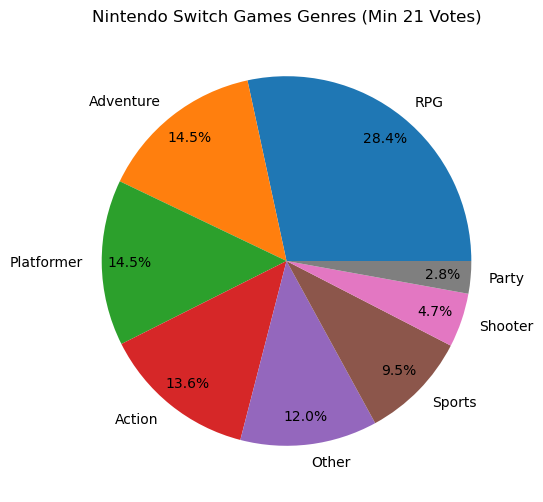

In [27]:
# generate pie chart describing share of most commonly reviewed game genres

df_genres.plot(kind='pie', figsize = (12,6), autopct = '%1.1f%%', pctdistance=0.85)
plt.title('Nintendo Switch Games Genres (Min 21 Votes)')
plt.ylabel('')
plt.show()

In [28]:
# show number of players for games in df_reviewed

df_reviewed['num_players'].value_counts()

num_players
1                138
2                 57
4                 52
8                 28
6                 11
10                 5
1 (8 Online)       3
5                  2
12                 2
4 (12 Online)      2
16                 1
4 (8 Online)       1
1 (12 Online)      1
Name: count, dtype: int64

In [29]:
# list number of null values for num_players column

df_reviewed['num_players'].isnull().sum()

14

In [30]:
# replace nulls with 1 since all games allow single play option

df_reviewed['num_players'].fillna('1', inplace=True)

In [31]:
# create list to eliminate "(X Online)" description in num_players column

num_players_list = df_reviewed['num_players']

In [32]:
# update list to remove the "(X Online)" text from all rows in num_players column with for loop

for i in df_reviewed.index:
    s = num_players_list[i]
    if s.find('(') == -1:
        num_players_list[i] = s
    else:
        num_players_list[i] = s[0:s.find('(')-1]        
#num_players_list

In [33]:
# insert modified list as a new column that does not include online player quantity --> describe as offline players

df_reviewed.insert(8, 'num_players_offline', num_players_list)

In [35]:
pd.set_option('display.max_rows', None)
df_reviewed[['num_players','num_players_offline']].tail(20)

,num_players,num_players_offline
297,2,2
298,2,2
299,4,4
300,1,1
301,4,4
302,1,1
303,8,8
304,1,1
305,4,4
306,1,1


In [36]:
# check for empty data in num_players_offline column

df_reviewed[df_reviewed['num_players_offline']==' ']

,id,title,system,publisher,developer,genre,genre_reduced,num_players,num_players_offline,release_date,review,review_conclusion,num_votes,rating


In [37]:
# count number of offline players for each game

df_reviewed['num_players_offline'].value_counts()

num_players_offline
1     156
2      57
4      55
8      28
6      11
10      5
5       2
12      2
16      1
Name: count, dtype: int64

In [38]:
# sort by game rating to find best options

df_reviewed_sorted = df_reviewed.sort_values(by='rating', ascending=False)

In [39]:
# collect 10 top rated single-player games

df_top10_single_player = df_reviewed_sorted[df_reviewed_sorted['num_players_offline']=='1'].head(10)
df_top10_single_player

,id,title,system,publisher,developer,genre,genre_reduced,num_players,num_players_offline,release_date,review,review_conclusion,num_votes,rating
316,97fc82c2,The Legend of Zelda: Breath of the Wild,Nintendo Switch,Nintendo,Nintendo SPD,Action Adventure,Adventure,1,1,3rd Mar 2017,The Legend of Zelda has always been a franchis...,The Legend of Zelda: Breath of the Wild is a l...,2782,9.6
1,54ce4908,Xenoblade Chronicles 3,Nintendo Switch,Nintendo,Monolith Soft,RPG,RPG,1,1,29th Jul 2022,The Xenoblade Chronicles 3 key art promises a ...,Xenoblade Chronicles 3 is a genuine masterpiec...,70,9.4
24,fbc872d6,Metroid Dread,Nintendo Switch,Nintendo,Nintendo MercurySteam,Action Adventure,Adventure,1,1,8th Oct 2021,After absolutely nailing its first shot at a M...,Metroid Dread is a triumphant return for both ...,952,9.3
103,8f5138a4,Xenoblade Chronicles: Definitive Edition,Nintendo Switch,Nintendo,Monolith Soft,RPG,RPG,1,1,29th May 2020,If you were around to browse this site about n...,Simply put there’s almost nothing one can rea...,479,9.3
153,322d1231,Dragon Quest XI S: Echoes of an Elusive Age - ...,Nintendo Switch,Square Enix,Square Enix,RPG,RPG,1,1,27th Sep 2019,It’s fascinating to see how much the JRPG genr...,Dragon Quest XI S: Echoes of an Elusive Age - ...,872,9.1
0,4377dbf1,Splatoon 3,Nintendo Switch,Nintendo,Nintendo,Action,Action,1 (8 Online),1,9th Sep 2022,When the original Splatoon launched on the Wii...,Splatoon 3 is more of the same but refined to...,42,9.1
9,5d25498b,Kirby and the Forgotten Land,Nintendo Switch,Nintendo,HAL Laboratory,Action Platformer,Platformer,1,1,25th Mar 2022,Well. Its finally here. In celebration of 30 w...,Kirby and the Forgotten Land is a great big co...,173,9.0
171,56c0abda,Fire Emblem: Three Houses,Nintendo Switch,Nintendo,Intelligent Systems,Adventure RPG Strategy,RPG,1,1,26th Jul 2019,Fire Emblem has been through quite a rollercoa...,There was a lot riding on it but we can confi...,894,9.0
231,2771051d,Xenoblade Chronicles 2: Torna - The Golden Cou...,Nintendo Switch,Nintendo,Monolith Soft,Adventure RPG,RPG,1,1,21st Sep 2018,By the time Xenoblade Chronicles 2 launched in...,Nintendo Switch is no stranger to DLC and add-...,264,8.9
112,06847e1a,Animal Crossing: New Horizons,Nintendo Switch,Nintendo,Nintendo,Adventure Puzzle Simulation,Adventure,1 (8 Online),1,20th Mar 2020,Back when – what feels like forever ago – we f...,Animal Crossing: New Horizons takes Animal Cro...,1214,8.8


In [42]:
import plotly.express as px

fig = px.bar(df_top10_single_player, x='title', y='rating', color='genre_reduced',
             labels={'title': 'Game Title', 'rating': 'Rating out of 10', 'genre_reduced':'genre'},
             title='Top Rated Single Player Games')
fig.update_layout(yaxis_range = [8.5,10])

fig.show()

In [43]:
# collect 10 top rated two-player and multiplayer(>2) games

df_top10_two_player = df_reviewed_sorted[df_reviewed_sorted['num_players_offline']=='2'].head(10)
df_top10_multi_player = df_reviewed_sorted[(df_reviewed_sorted['num_players_offline']!='1')& 
                                           (df_reviewed_sorted['num_players_offline']!='2')].head(10)

In [46]:
fig = px.bar(df_top10_two_player, x='title', y='rating', color='genre_reduced',
             labels={'title': 'Game Title', 'rating': 'Rating out of 10', 'genre_reduced':'genre'},
             title='Top Rated Two-Player Games')
fig.update_layout(yaxis_range = [8,10])

fig.show()

In [48]:
fig = px.bar(df_top10_multi_player, x='title', y='rating', color='genre_reduced',
             labels={'title': 'Game Title', 'rating': 'Rating out of 10', 'genre_reduced':'genre'},
             title='Top Rated Multi-Player Games')
fig.update_layout(yaxis_range = [8,10])

fig.show()